In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split

In [2]:
df_response = pd.read_csv('..//..//Data/permeability_response.csv')
df_response.head()

,Unnamed: 0,permeability
0,1,12.520
1,2,1.120
2,3,19.405
3,4,1.730
4,5,1.680


In [3]:
df_predictors = pd.read_csv('..//..//Data/permeability_predictors.csv')
df_predictors.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107
0,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_response = df_response['permeability']
df_response

0      12.520
1       1.120
2      19.405
3       1.730
4       1.680
        ...  
160     0.705
161     0.525
162     1.545
163    39.555
164     0.795
Name: permeability, Length: 165, dtype: float64

In [5]:
df_predictors.drop(columns='Unnamed: 0', inplace=True)
df_predictors

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
162,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,1,1


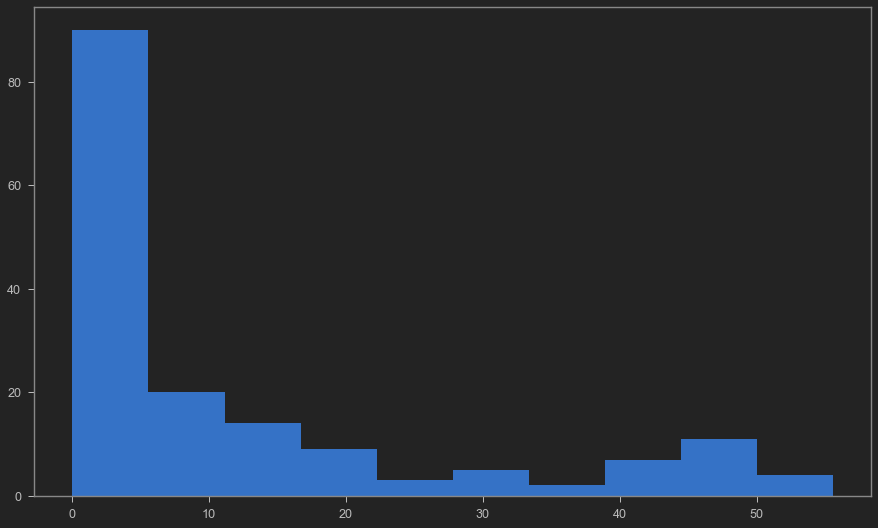

In [36]:
plt.hist(response, label='Permeability response', bins=10);

<AxesSubplot:>

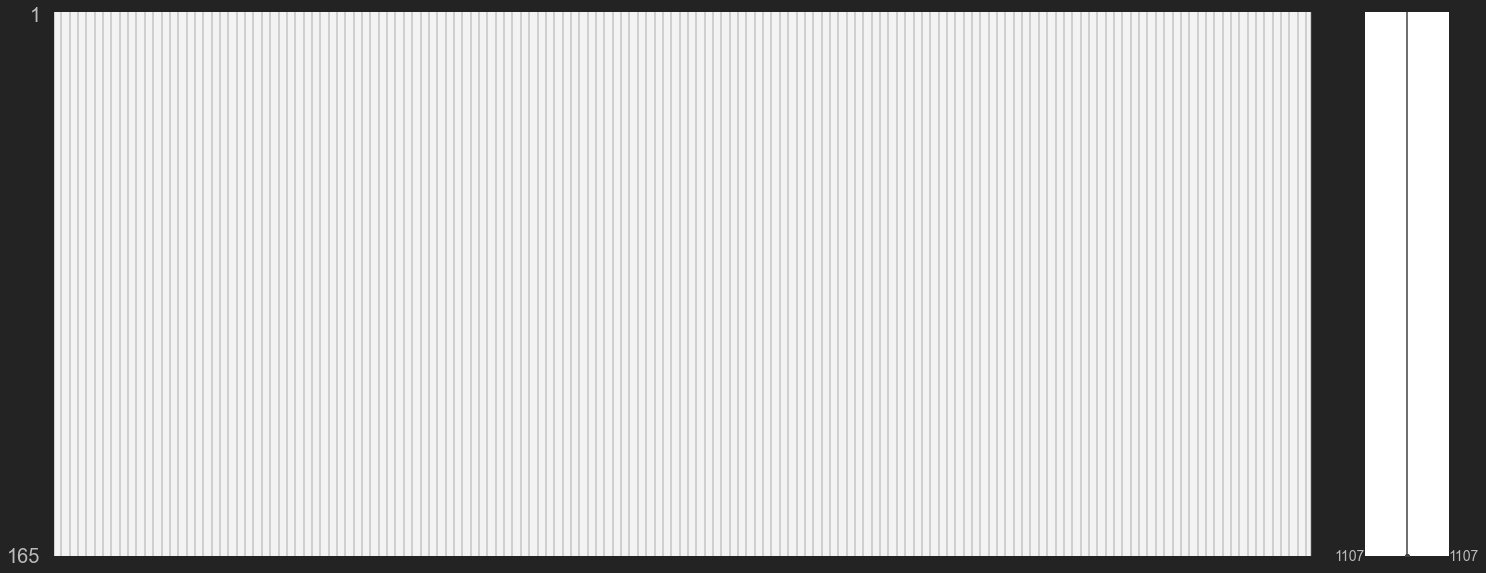

In [10]:
msno.matrix(df_predictors)

In [14]:
np.sum(np.sum(df_predictors.isna()))

0

### I think the most important thing with splitting this dataset is to make sure that the distributions of the response variable are the same in both subsets. There shouldn't be any imbalances in the subsets and all possible values should be uniformly represented. It is especially important with this dataset, since the respone is highly skewed.


In [79]:
# Implementig numerical stratification splitting. Not just one split but function for splitting the data so it can be used with a resamplig technique.

def numerical_stratification(x, y, ratio, n_bins):
    # The 0.0001 are to ensure that the maximal or minimal value in y won't be placed in a separate bin.
    # That would make it the only element in that bin, which would cause the split to fail, since it requieres at least two point in each bin.
    bins = np.linspace(y.min() - 0.0001, y.max() + 0.0001, num=n_bins)
    y_binned = np.digitize(y, bins)
    return train_test_split(x, y, train_size=ratio, stratify=y_binned), bins

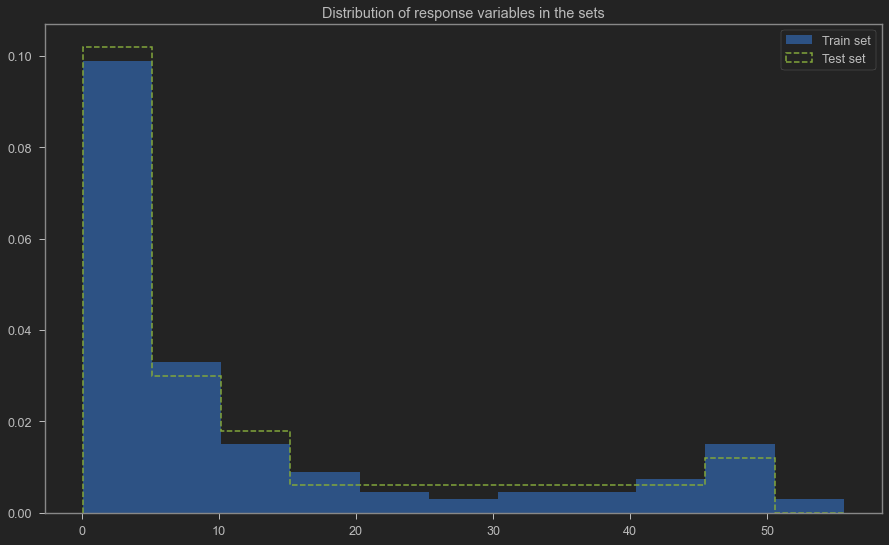

In [81]:
bins = 12
(X_train, X_test, Y_train, Y_test), bins_arr = numerical_stratification(x=df_predictors, y=df_response, ratio=0.8, n_bins=bins)
plt.hist(Y_train, alpha=0.6, bins=bins_arr, density=True, label='Train set')
plt.hist(Y_test, histtype='step', linestyle='--', lw=1.5, bins=bins_arr, density=True, label='Test set')
plt.title('Distribution of response variables in the sets')
plt.legend();